In [1]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd

In [7]:
# Load shape data for US states.
states = geopandas.read_file('data/usa-states-census-2014.shp')

# Part 1:  White Population and Birth Rate

From [ChadNet](https://forum.chadnet.org/thread.php?p=1392)

A few posts ago I mentioned that I have been compiling a project in which I categorize states by categories. I will begin with first half in this post and their point rating. With a state being given a 6 being overwhelmingly white, and a 1, "Multicultural" bario.

In [6]:
part1 = pd.read_csv('asap.csv')
part1

,state,white_population,white_births,points
0,Vermont,94.3,90.5,6
1,West Virginia,93.0,91.0,6
2,Maine,93.0,88.7,6
3,New Hampshire,92.8,85.4,6
4,Montana,85.5,80.0,6
5,Wyoming,83.3,77.7,6
6,Kentucky,81.3,80.3,6
7,Idaho,81.1,76.4,6
8,Utah,75.3,73.5,5
9,North Dakota,83.2,71.6,5


## Adding ASAP Data to Shape Data

There was a StackOverflow answer that said **[DON'T](https://stackoverflow.com/a/55557758/19908235)** iterate through DataFrames, but I think these DataFrames are small enough for it to be a non-issue.

In [9]:
# Insert a new column 'points' into the states DataFrame.
sp = {}
for i,x in enumerate(part1.state):
  sp[x] = part1.points[i]
sp['District of Columbia'] = sp['Washington DC']
sp['Nebraska'] = 0
points = [ sp[x] for x in states.NAME ]
states.insert(len(states.columns), "points", points)

<AxesSubplot:>

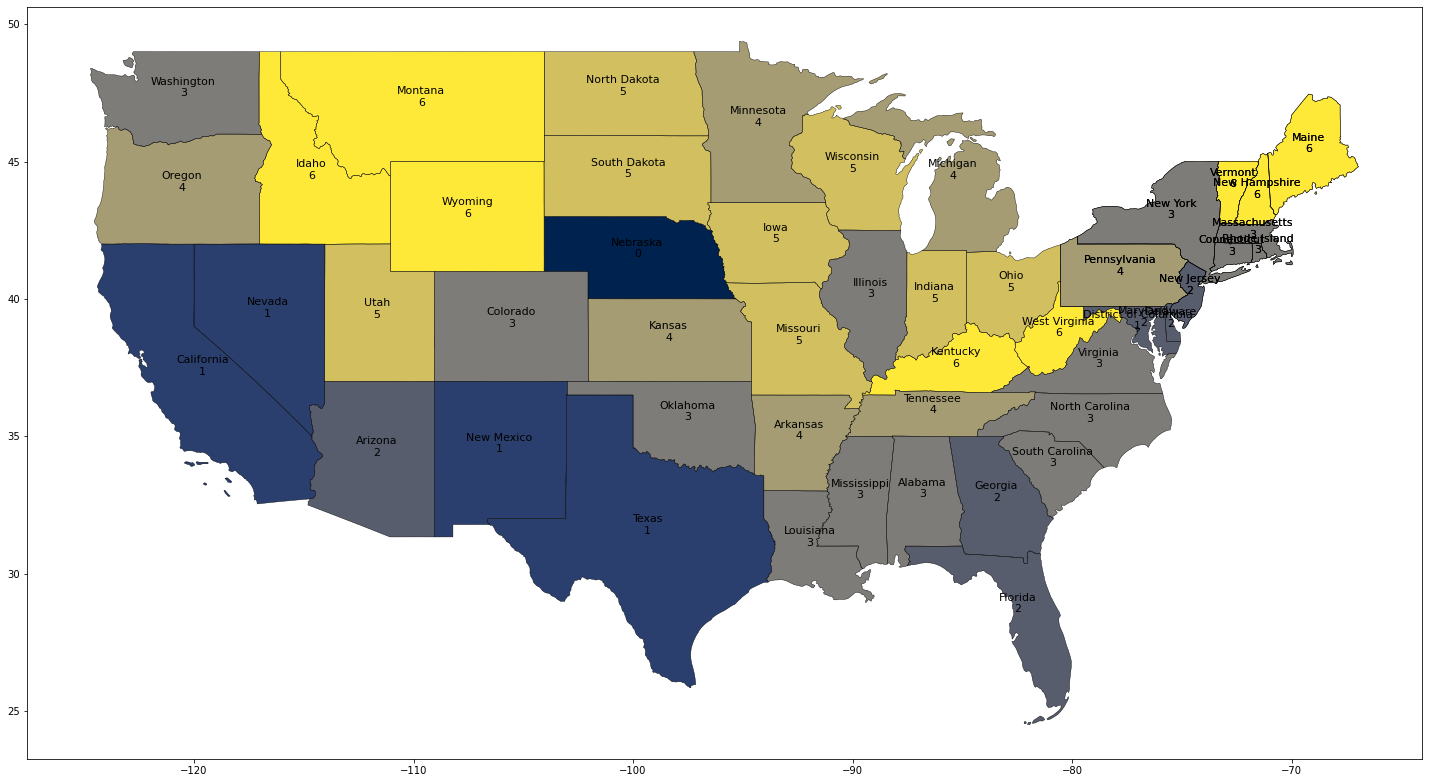

In [10]:
# Generate a plot of US states colored by their point rating.
# TODO: Include Alaska and Hawaii.
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(text=x.NAME + "\n" + str(x.points), xy=x.geometry.centroid.coords[0], ha='center', fontsize=11),axis=1);
states.boundary.plot(ax=ax, color='Black', linewidth=.4)
states.plot(ax=ax, cmap='cividis', column='points', figsize=(12, 12))